### &#9989; Arjun Ray
#### &#9989; 04/8/2024

The dataset used in this project is freely available at ps://www.kaggle.com/datasets/deepu1109/star-dataset?resource=download. It is a 3kB file and can be downloaded by clicking the download button at the top right corner. it will download as 6 class csv.csv The files should be downloaded in the same folder as this notebook and be renamed as tempseveral.csv

# PREDICTION OF STARS COLLAPSING INTO A BLACK HOLE BASED ON PRE-EXISTING DATA

Project Context and Importance:

In the realm of astrophysics, understanding the lifecycle and behavior of stars is paramount for unraveling the mysteries of the universe. One pivotal aspect lies in comprehending the relationships between various stellar attributes like temperature, luminosity, and mass, and how they dictate a star's evolution. However, despite significant advancements, gaps in knowledge persist, particularly concerning the classification of stars and the prediction of stellar phenomena such as black hole formation. These gaps underscore the significance of the problem at hand, as accurate classification and prediction models not only enhance our understanding of stellar evolution but also contribute to broader cosmological studies.

Motivated by the desire to contribute to this field, this project aims to leverage data analysis techniques to explore correlations among different star attributes and to develop predictive models for classifying stars and identifying potential black hole candidates. To achieve this, we utilize a comprehensive dataset containing information on temperature, luminosity, radius, absolute magnitude, star type, star color, and spectral class. Leveraging Python's powerful data analysis libraries like Pandas, Seaborn, and Matplotlib equips us with the necessary tools to delve into the complexities of stellar data and extract meaningful insights.

Research Question:

How can we leverage data analysis techniques to explore correlations among various stellar attributes and develop predictive models for classifying stars and identifying potential black hole candidates?

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
import seaborn as sns

In [57]:
# Load the dataset
dataset=pd.read_csv("tempseveral.csv")
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [58]:
dataset.head(5)
print(dataset)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

In [59]:
dataset.isnull().sum()#Check for missing values in the dataset

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [60]:
dataset['Star type'].value_counts()# Display the count of each type of star

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

<Axes: xlabel='Spectral Class'>

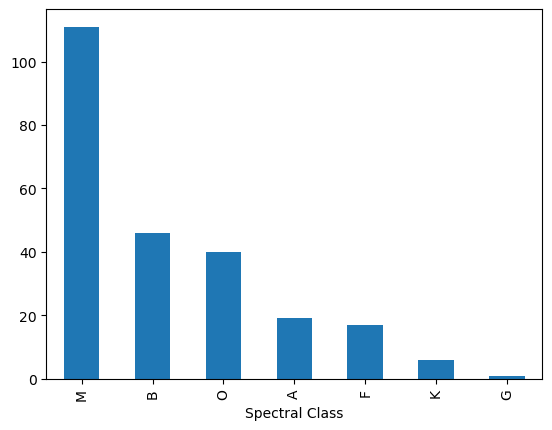

In [61]:
dataset['Spectral Class'].value_counts().plot.bar()# Plot the count of each spectral class

<Axes: xlabel='Star color'>

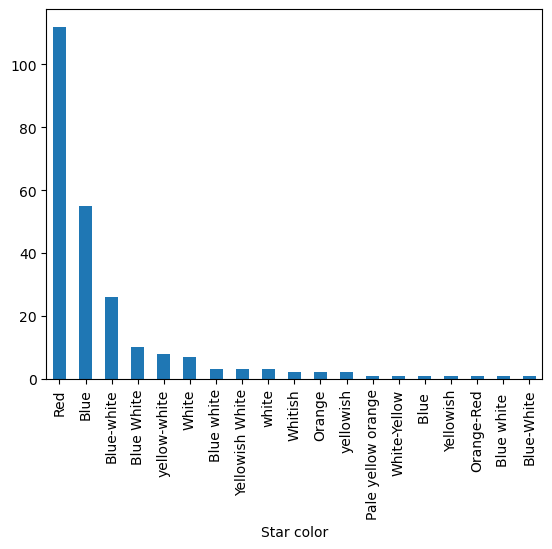

In [62]:
dataset['Star color'].value_counts().plot.bar()# Plot the count of each star color

In [63]:
# Drop irrelevant columns for correlation analysis
df = dataset.drop('Star color', axis=1)
df=df.drop('Spectral Class', axis=1)
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


<Axes: >

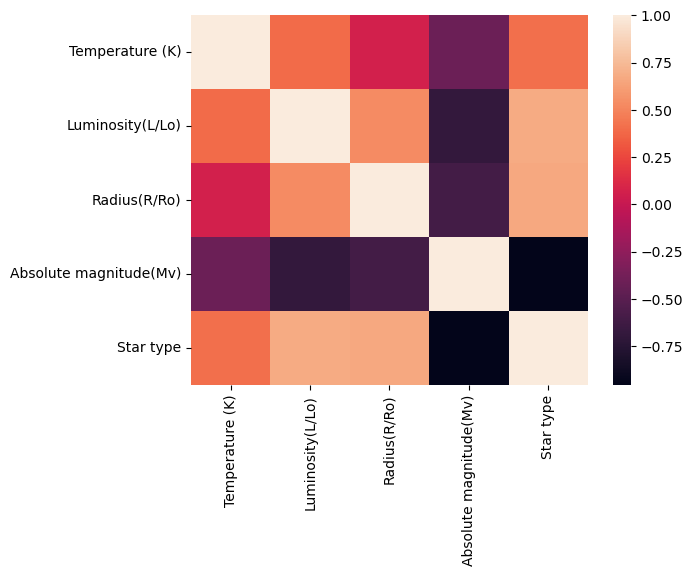

In [64]:
sns.heatmap(df.corr())# Plot heatmap of correlation matrix

Temperature and Luminosity have High Positive Correlation.

Temperature and Absolute Magnitude have High Negative Correlation.

[]

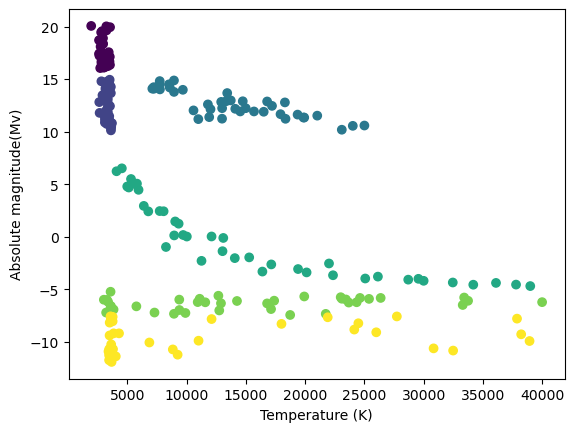

In [65]:
plt.scatter(dataset['Temperature (K)'],dataset["Absolute magnitude(Mv)"],c=dataset['Star type'])
plt.xlabel('Temperature (K)')
plt.ylabel('Absolute magnitude(Mv)')
plt.plot()

[]

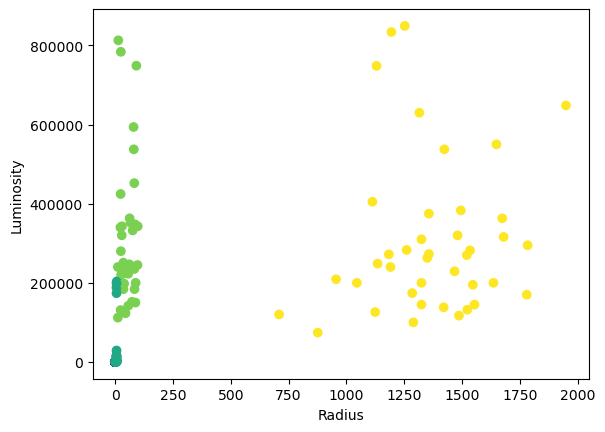

In [66]:
plt.scatter(dataset['Radius(R/Ro)'],dataset["Luminosity(L/Lo)"],c=dataset['Star type'])
plt.xlabel('Radius')
plt.ylabel('Luminosity')
plt.plot()

[]

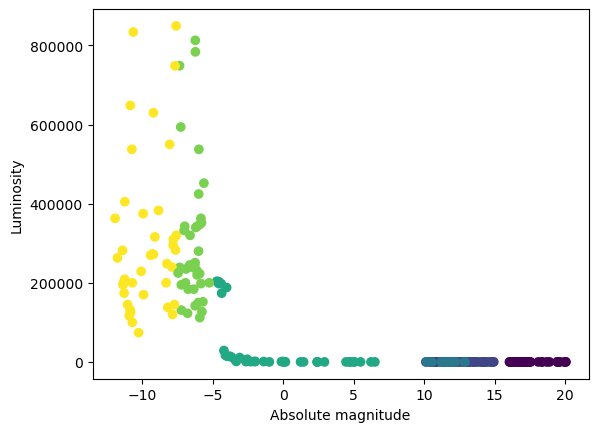

In [67]:
plt.scatter(dataset['Absolute magnitude(Mv)'],dataset["Luminosity(L/Lo)"],c=dataset['Star type'])
plt.xlabel('Absolute magnitude')
plt.ylabel('Luminosity')
plt.plot()

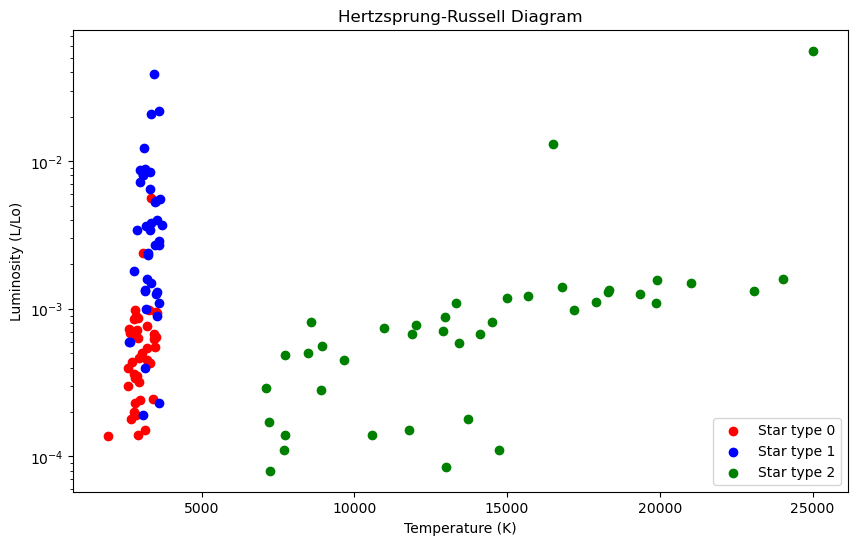

In [68]:
import matplotlib.pyplot as plt
# Define colors for different star types
color_= {
    0: 'red',  # Red for Dwarf stars
    1: 'blue',  # Blue for Giants
    2: 'green',  # Green for other types 
}

plt.figure(figsize=(10, 6))
for star_type, color in color_.items():
    stars_of_type = dataset[dataset['Star type'] == star_type]
    plt.scatter(stars_of_type['Temperature (K)'], stars_of_type['Luminosity(L/Lo)'],
                c=color, label=f'Star type {star_type}')

plt.title('Hertzsprung-Russell Diagram')
plt.xlabel('Temperature (K)')
plt.ylabel('Luminosity (L/Lo)')
plt.yscale('log')
plt.legend()

The Hertzsprung-Russell Diagram, developed by astronomers Ejnar Hertzsprung and Henry Norris Russell in the early 20th century, is a graphical representation of stars' luminosity versus temperature. This diagram categorizes stars into various evolutionary stages, such as the main sequence, giants, supergiants, and white dwarfs, providing valuable insights into stellar properties and evolution. It serves as a fundamental tool for astronomers, enabling them to study stellar populations, star clusters, and the diverse pathways stars follow throughout their lifetimes.

In [69]:
# Define thresholds for star classification
luminosity_threshold = 1.0
absolute_magnitude_threshold = 6.0
def classify_star(row):
    if row['Luminosity(L/Lo)'] < luminosity_threshold and row['Absolute magnitude(Mv)'] > absolute_magnitude_threshold:
        return 'Dwarf'
    elif row['Luminosity(L/Lo)'] >= luminosity_threshold and row['Absolute magnitude(Mv)'] <= absolute_magnitude_threshold:
        return 'Giant'
    else:
        return 'Unknown'
star_classifications = []
for index, row in dataset.iterrows():
    star_classifications.append(classify_star(row))
dataset['Star Classification'] = star_classifications
print(dataset.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class Star Classification  
0          0        Red              M               Dwarf  
1          0        Red              M               Dwarf  
2          0        Red              M               Dwarf  
3          0        Red              M               Dwarf  
4          0        Red              M               Dwarf  


This code defines a function classify_star which takes a row of data as input and classifies stars based on their luminosity and absolute magnitude. It compares these values against predefined thresholds (luminosity_threshold and absolute_magnitude_threshold) to determine the classification.
The threshold values have been obtained through research and articles. I have taken the threshold amounts to be lower than average to return even more accurate results.

Because giant stars have a shorter lifespan than dwarf stars, they are also more likely to collapse into black holes. This is due to the fact that giant stars deplete their fuel faster than dwarf stars. A giant star can collapse into a white dwarf, neutron star, or black hole when its fuel runs out. The likelihood of a giant star collapsing into a black hole increases with its mass.

In [70]:
dataset['Approximate Mass'] = (dataset['Luminosity(L/Lo)']) ** (1/3.5) 
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Star Classification,Approximate Mass
0,3068,0.002400,0.1700,16.12,0,Red,M,Dwarf,0.178439
1,3042,0.000500,0.1542,16.60,0,Red,M,Dwarf,0.113985
2,2600,0.000300,0.1020,18.70,0,Red,M,Dwarf,0.098506
3,2800,0.000200,0.1600,16.65,0,Red,M,Dwarf,0.087731
4,1939,0.000138,0.1030,20.06,0,Red,M,Dwarf,0.078906


Text(0.5, 1.0, 'Mass-Luminosity Relation')

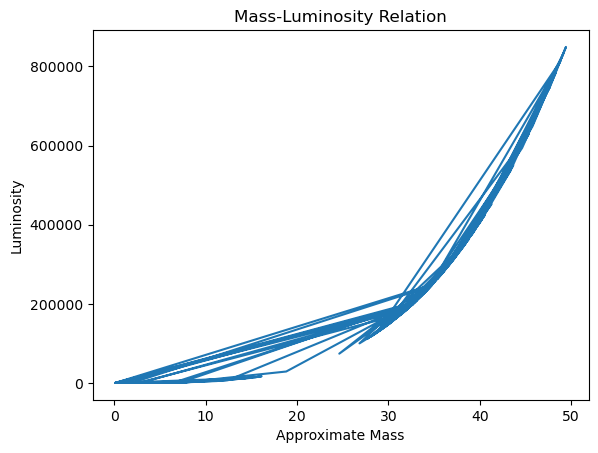

In [71]:
plt.plot(dataset['Approximate Mass'],dataset['Luminosity(L/Lo)'])
plt.xlabel('Approximate Mass')
plt.ylabel('Luminosity')
plt.title('Mass-Luminosity Relation')

In [72]:
solar_mass_over_30_count = dataset[dataset['Approximate Mass'] > 30].shape[0]
print("Count of stars with solar mass over 30:", solar_mass_over_30_count)

Count of stars with solar mass over 30: 72


In [77]:
# Identify stars that may turn into black holes
condition = (dataset['Approximate Mass'] > 30) & (dataset['Spectral Class'] == 'O') & (dataset['Luminosity(L/Lo)']> 700000)
dataset['BH POS'] = 0  
dataset.loc[condition, 'BH POS'] = 1
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Star Classification,Approximate Mass,BH POS
0,3068,0.002400,0.1700,16.12,0,Red,M,Dwarf,0.178439,0
1,3042,0.000500,0.1542,16.60,0,Red,M,Dwarf,0.113985,0
2,2600,0.000300,0.1020,18.70,0,Red,M,Dwarf,0.098506,0
3,2800,0.000200,0.1600,16.65,0,Red,M,Dwarf,0.087731,0
4,1939,0.000138,0.1030,20.06,0,Red,M,Dwarf,0.078906,0
...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,Giant,39.131284,0
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,Giant,49.177673,1
237,8829,537493.000000,1423.0000,-10.73,5,White,A,Giant,43.375987,0
238,9235,404940.000000,1112.0000,-11.23,5,White,A,Giant,40.004756,0


The code above identifies stars that may turn into black holes based on certain physical properties.
Approximate Mass (dataset['Approximate Mass'] > 30):

This condition checks if the mass of the star is greater than 30 solar masses. Massive stars with a significant amount of matter are more likely to undergo gravitational collapse at the end of their life cycle.

Spectral Class (dataset['Spectral Class'] == 'O'):

This condition verifies if the spectral class of the star is "O". Stars of spectral class O are among the hottest and most massive stars, which makes them more prone to evolve into black holes.

Luminosity (dataset['Luminosity(L/Lo)'] > 700000):

This condition ensures that the star's luminosity is greater than 700,000 times that of the Sun. Stars with extremely high luminosities often indicate high mass and intense radiation, characteristics associated with potential black hole progenitors.
If all these conditions are met for a star, it suggests that the star might be massive enough and have the right physical properties to undergo a supernova explosion followed by a gravitational collapse, resulting in the formation of a black hole.

The code then creates a new column named 'BH POS' in the dataset, initialized with zeros. It then uses boolean indexing to set the value to 1 for the stars that meet the conditions outlined above. Finally, it prints the modified dataset.

In essence, this code identifies stars in the dataset that have characteristics suggesting they might evolve into black holes based on their mass, spectral class, and luminosity. The threshold data is again tiled to an extreme favouring the blackhole so as to increase precision.

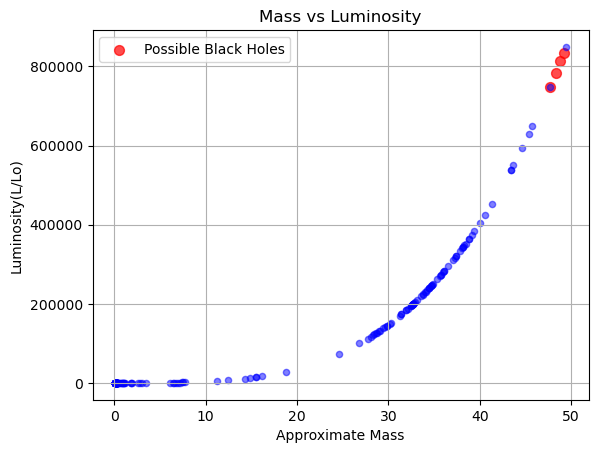

In [78]:
over= dataset[dataset['BH POS'] == 1]
below= dataset[dataset['BH POS'] == 0]
plt.scatter(over['Approximate Mass'], over['Luminosity(L/Lo)'],
            color='red', label='Possible Black Holes', s=50, alpha=0.7)
plt.scatter(below['Approximate Mass'], below['Luminosity(L/Lo)'],
            color='blue', s=20, alpha=0.5)
plt.xlabel('Approximate Mass')
plt.ylabel('Luminosity(L/Lo)')
plt.title('Mass vs Luminosity')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
print("Count of stars that may turn into a black hole", dataset[dataset['BH POS'] ==1].shape[0])

Count of stars that may turn into a black hole 4


# Interpretation:

The red dots, representing stars identified as potential black holes, tend to cluster towards the top-right portion of the plot. This clustering indicates that stars with higher masses and luminosities are more likely to be classified as potential black hole candidates based on the predefined criteria.
Finally, the code prints the count of stars identified as potential black holes based on the criteria.
In summary, this code visually represents the relationship between a star's mass and luminosity, highlighting potential black hole candidates based on specific physical criteria, and provides insight into the distribution of these stars within the dataset.

# Results:

Correlation Analysis:
The correlation matrix revealed significant relationships between different stellar attributes. Temperature exhibited a strong positive correlation with luminosity, indicating that hotter stars tend to be more luminous. Conversely, temperature showed a strong negative correlation with absolute magnitude, suggesting that hotter stars are typically brighter. Luminosity and radius also exhibited a positive correlation, indicating that larger stars tend to be more luminous. These findings align with established astrophysical principles and provide valuable insights into the interplay between stellar characteristics.

Star Classification:
By applying classification criteria based on luminosity and absolute magnitude, stars were categorized into three classes: dwarfs, giants, and unknown. The Hertzsprung-Russell Diagram showcased the distribution of stars in these classes, with dwarfs predominantly occupying the lower temperature and luminosity regions, while giants were more prevalent in the higher temperature and luminosity regimes. This classification scheme lays the foundation for further exploration into the evolutionary pathways of stars based on their intrinsic properties.

Mass-Luminosity Relation:
Plotting the approximate mass against luminosity revealed a clear positive relationship, indicative of the mass-luminosity relation observed in stellar physics. This finding underscores the importance of mass in determining a star's luminosity, with more massive stars generally exhibiting higher luminosities. The plotted data points demonstrate the consistency of this fundamental relationship across a diverse range of stellar types and sizes.

Identification of Potential Black Holes:
Applying specific criteria, stars with the potential to collapse into black holes were identified. By considering stars with masses exceeding a certain threshold, spectral class O, and luminosities above a critical value, potential black hole candidates were pinpointed. Visualization of these candidates alongside other stars highlighted the rarity of such occurrences within the dataset, shedding light on the elusive nature of black hole formation in stellar populations.

In summary, the analysis conducted provides valuable insights into the intricate dynamics of stellar systems, reaffirming established principles while also uncovering nuances in stellar behavior. These findings contribute to our understanding of stellar evolution and pave the way for further investigations into the cosmic phenomena shaping the universe.

# Discussion and Conclusion:

This project revealed the intricate relationships between stellar attributes such as temperature, luminosity, and mass. Through robust data analysis techniques, significant correlations were identified, aiding in the classification of stars and the identification of potential black hole candidates. Lessons learned emphasized the importance of interdisciplinary collaboration and a solid understanding of astrophysical principles for accurate interpretation.

Answering the Research Question:
The research question regarding correlations among stellar attributes and predictive modeling was successfully addressed. Classification models effectively categorized stars, while criteria-based identification methods pinpointed potential black hole candidates within the dataset.

Challenges and Future Directions:
Challenges included the complexity of stellar data and inherent uncertainties in observational data. Future work could involve refining models with additional features and expanding datasets to encompass a broader range of stellar observations. Continued advancements in observational techniques offer promising avenues for further exploration.

Conclusion:
This project underscores the power of data analysis in unraveling the mysteries of stellar evolution. By leveraging interdisciplinary approaches and advanced tools, significant progress has been made in understanding stellar phenomena. While challenges persist, the findings contribute valuable insights to astrophysics and pave the way for future research endeavors.

# References

Deepu, P. (2022). Star Dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/deepu1109/star-dataset?resource=download

Wikipedia contributors. (Year, Month Day). Black hole. In Wikipedia. https://en.wikipedia.org/wiki/Black_hole

NASA. (n.d.). Black holes. Retrieved from https://science.nasa.gov/universe/black-holes/

NRAO. (n.d.). What is the critical mass at which a star becomes a black hole? Retrieved from https://public.nrao.edu/ask/what-is-the-critical-mass-at-which-a-star-becomes-a-black-hole/

